## Token Merging for Stable Diffusion running with OpenVINO demo
This notebook demonstrates how to use Token Merging method to accelerate Stable Diffusion model running with OpenVINO. The method is applied to PyTorch model before exporting to OpenVINO representation.

In [1]:
import tomeov
from diffusers import StableDiffusionPipeline
from optimum.intel.openvino import OVStableDiffusionPipeline
from IPython.display import display

/home/alex/virt_envs/tomeov/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/alex/virt_envs/tomeov/lib/python3.8/site-packages/diffusers/models/cross_attention.py:30: FutureWarning: Importing from cross_attention is deprecated. Please import from diffusers.models.attention_processor instead.
  deprecate(


* Create a pipiline with Token Merging applied to a Stable Diffusion model and export it to OpenVINO representation.

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")


# Apply ToMe with a 50% merging ratio
tomeov.apply_patch(pipe, ratio=0.4) # Can also use pipe.unet in place of pipe here

save_dir = "stable_diffusion_optimized"
tomeov.export_diffusion_pipeline(pipe, save_dir)

* Create OpenVINO-based pipeline. We fix image size for faster inference.

In [3]:
ov_pipe = OVStableDiffusionPipeline.from_pretrained(save_dir, compile=False)
ov_pipe.reshape(batch_size=1, height=512, width=512, num_images_per_prompt=1)
ov_pipe.compile()

The config attributes {'requires_safety_checker': True, 'safety_checker': ['stable_diffusion', 'StableDiffusionSafetyChecker']} were passed to OVStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Compiling the encoder and creating the inference request ...
Compiling the encoder and creating the inference request ...
Compiling the encoder and creating the inference request ...


* Generate and display the image.

100%|██████████| 51/51 [01:11<00:00,  1.39s/it]


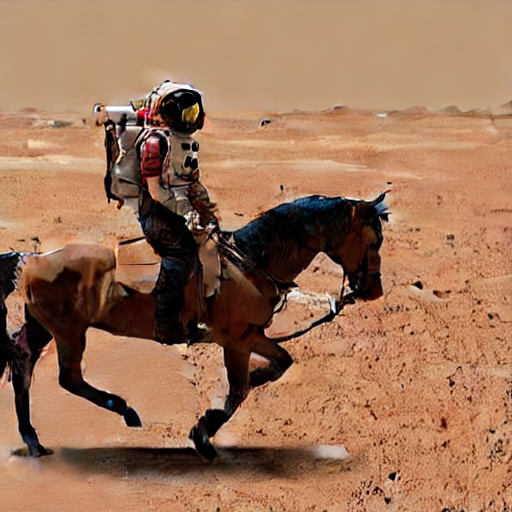

In [4]:
prompt = "a photo of an astronaut riding a horse on mars"
output = ov_pipe(prompt, num_inference_steps=50, output_type="pil")
display(output.images[0])